In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Punto 1

In [4]:
cmr_data = pd.read_csv('data/costo_marginal_real.csv')
cmp_data = pd.read_csv('data/costo_marginal_programado.csv')
display(cmr_data.head(),cmp_data.head())

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [32]:
print(cmr_data.duplicated().sum())
print(cmp_data.duplicated().sum())

0
0


In [6]:
cmp_data.drop_duplicates(inplace = True)

In [7]:
costo_marginal = pd.merge(cmr_data, cmp_data, left_on = ['barra_mnemotecnico','fecha','hora'],right_on = ['mnemotecnico_barra','fecha','hora'], how = 'left')
costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,mnemotecnico_barra,nombre_barra,costo
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV,NaN,NaN,NaN
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV,NaN,NaN,NaN
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1,NaN,NaN,NaN
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1,NaN,NaN,NaN
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1,NaN,NaN,NaN


In [8]:
costo_marginal[np.isnan(costo_marginal['costo_en_dolares'])]

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,mnemotecnico_barra,nombre_barra,costo


In [9]:
costo_marginal = costo_marginal.loc[:,['barra_mnemotecnico','barra_referencia_mnemotecnico','fecha','hora','costo_en_dolares','costo_en_pesos','costo','nombre']]
costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,costo,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,NaN,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,NaN,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,NaN,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,NaN,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,NaN,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


Tal como se puede leer desde el código anterior, existen registros duplicados los cuales por simplicidad en términos de ganar tiempo para intentar completar el desaifío, estos simplemente fueron eliminados. Además el merge fue realizado utlizando un `left join`, dado que el costo real (en mi impresión) es la más importante y por ende tener observaciones con costo real `NaN` no estaría aportando.

Por otro lado, a continuación se muestran histogramas y boxplot respecto a los costos marginales reales y programados para tener alguna idea de como están distribuidos. Como se puede ver, las distribuciones son muy similares

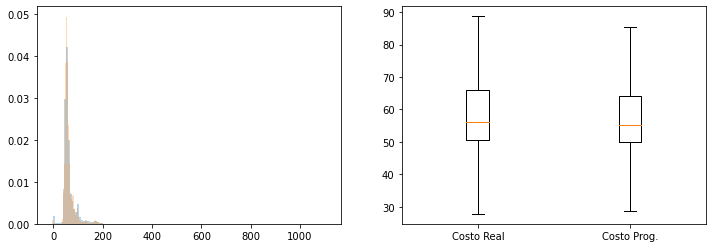

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
ax[0].hist(costo_marginal['costo_en_dolares'],bins = 150,density = True, alpha = 0.3)
ax[0].hist(costo_marginal['costo'].dropna(), bins = 150, density = True, alpha = 0.3)
ax[1].boxplot([costo_marginal['costo_en_dolares'],costo_marginal['costo'].dropna()], 
           labels = ['Costo Real','Costo Prog.'],
          showfliers = False)
plt.show()

Sin embargo, al aplicar el test de Kolmogorov-Smirnov para determinar si dicha similitud es estadísticamente significativa, nos encontramos con que no estan muestreados desde la misma distribución apesar de su similitud. Lo anterior se puede deber a la diferencia de peso que tiene en las colas la distribución (outliers)

In [33]:
from scipy import stats
stats.ks_2samp(costo_marginal['costo_en_dolares'], costo_marginal['costo'].dropna())

KstestResult(statistic=0.048133464923792446, pvalue=0.0)

En cuanto a las barras, un resumen de la cantidad de barras reales, programadas y cuanto es el porcentaje de las barras que tienen costo programado respecto a las con costo real, se tiene el siguiente código.

In [11]:
print('Barras sin costo programado: ',costo_marginal['costo'].isna().sum())
print('Barras con costo programado: ',costo_marginal.shape[0]-costo_marginal['costo'].isna().sum())
print('Porcentaje de barras con costo programado: ',round((costo_marginal.shape[0]-costo_marginal['costo'].isna().sum())/costo_marginal.shape[0]*100,2), '%')

Barras sin costo programado:  3409022
Barras con costo programado:  913388
Porcentaje de barras con costo programado:  21.13 %


# Punto 2

A continuación creamos las variables sintéticas que están en el desafío

In [12]:
costo_marginal['desviacion'] = costo_marginal['costo_en_dolares'] - costo_marginal['costo']
costo_marginal['desviacion_pct'] = (costo_marginal['costo_en_dolares'] - costo_marginal['costo'])/costo_marginal['costo']*100
def costo_cat(value):
    if abs(value) > 15:
        res = 1
    else :
        res = 0
    return res
costo_marginal['desviacion_cat'] = costo_marginal['desviacion_pct'].apply(costo_cat)
costo_marginal.dropna()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,costo,nombre,desviacion,desviacion_pct,desviacion_cat
13,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,54.292145,BA S/E CENTRAL QUINTERO 220KV,3.727855,6.866289,0
16,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,60.620648,BA S/E NUEVA PICHIRROPULLI 220KV B1,2.979352,4.914748,0
20,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,59.177969,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,3.602031,6.086776,0
24,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,54.566605,BA S/E CENTRAL PEHUENCHE 220KV B1,3.983395,7.300060,0
28,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,56.086260,BA S/E SAN CRISTOBAL 110KV B1,4.303740,7.673429,0
...,...,...,...,...,...,...,...,...,...,...,...
4322387,BA05T005SE288T005,BA02T002SE032T002,2019-01-23,24,63.65,42.79953,132.934674,BA S/E SUR 110KV,-69.284673,-52.119339,1
4322390,BA01L081SE066L081,BA02T002SE032T002,2019-01-23,24,73.18,49.20770,53.174872,BA S/E FPC 154KV BP1,20.005128,37.621395,1
4322395,BA04T005SE071T005,BA02T002SE032T002,2019-01-23,24,67.20,45.18662,144.613620,BA S/E OVALLE 66KV,-77.413620,-53.531348,1
4322404,BA01L079SE004L079,BA02T002SE032T002,2019-01-23,24,77.61,52.18652,55.571525,BA S/E PUENTE ALTO (CMPC) 110KV,22.038475,39.657856,1


# Punto 3

A continuación creamos la función para generar los gráficos, tomando como parámetros el código de barra, fechas inicial y final 

In [13]:
costo_marginal_agg = costo_marginal.groupby(['barra_mnemotecnico','fecha']).agg('mean')[['costo_en_dolares','costo']]
costo_marginal_agg.reset_index(inplace = True)
costo_marginal_agg['fecha'] = pd.to_datetime(costo_marginal_agg['fecha'])
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    data_plot = costo_marginal_agg[(costo_marginal_agg['barra_mnemotecnico'] == codigo_barra) &
                                  (costo_marginal_agg['fecha'] >= fecha_inicial) &
                                  (costo_marginal_agg['fecha'] <= fecha_final)]
    fig, ax = plt.subplots()
    ax.plot(data_plot['fecha'],data_plot['costo_en_dolares'], label = 'CM_real', c = 'red', alpha = 0.4)
    ax.plot(data_plot['fecha'],data_plot['costo'], label = 'CM_programado', c = 'blue', alpha = 0.4)
    ax.legend(loc = 'upper right')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Costo Marginal promedio diario')
    plt.xticks(rotation=90)

Algunos ejemplos de como funciona. Aquí es importante mencionar que por simplicidad de código los datos fueron agrupados por barra y día, teniendo un costo marginal real promedio por hora. Lo anterior es por simplicidad y claridad del gráfico que se desplegará.

None

None

None

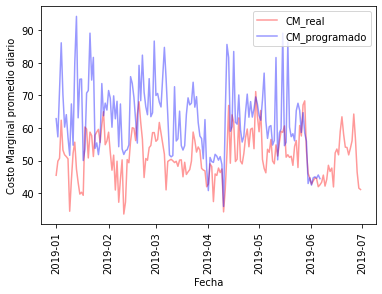

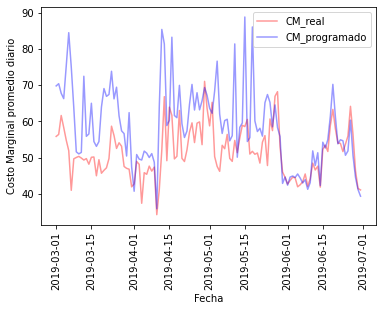

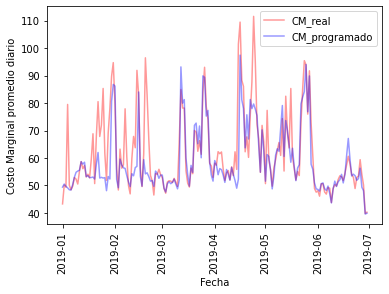

In [14]:
display(time_plot_costo_barra('BA05T005SE288T005','2019-01-01','2019-06-30'))
display(time_plot_costo_barra('BA12T025SE075T025','2019-03-01','2019-09-30'))
display(time_plot_costo_barra('BA01L081SE066L081','2019-01-01','2019-09-30'))

Determinando y eliminando las arras con costo marginal real 0

In [15]:
barra_en_cero = costo_marginal_agg.groupby(['barra_mnemotecnico']).agg('sum')['costo_en_dolares']
barra_en_cero = barra_en_cero[barra_en_cero == 0]
barra_en_cero.reset_index()
barra_en_cero.head()

barra_mnemotecnico
BA01G049SE001G049    0.0
BA01L038SE001L038    0.0
BA02T003SE009T003    0.0
BA02T005SE046T005    0.0
BA02T005SE082T005    0.0
Name: costo_en_dolares, dtype: float64

In [16]:
costo_marginal.set_index('barra_mnemotecnico',inplace = True)
costo_marginal.drop(index = barra_en_cero.index,inplace = True)

# Punto 4

Ahora cargaremos los datos que se utilizarán para hacer predicciones. 

In [17]:
datos_pred = pd.read_csv('data/base_para_prediccion.csv')
datos_pred.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


Algunas descripciones de datos, dimensión y tipos de datos

In [18]:
display(datos_pred.info())
display(datos_pred.describe())
display(datos_pred.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112779 entries, 0 to 112778
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nemotecnico_se            112779 non-null  object 
 1   fecha                     112779 non-null  object 
 2   hora                      112779 non-null  int64  
 3   gen_eolica_total_mwh      0 non-null       float64
 4   gen_geotermica_total_mwh  0 non-null       float64
 5   gen_hidraulica_total_mwh  34184 non-null   float64
 6   gen_solar_total_mwh       41818 non-null   float64
 7   gen_termica_total_mwh     61863 non-null   float64
 8   cmg_real                  112779 non-null  float64
 9   cmg_prog                  112779 non-null  float64
 10  cmg_desv                  112779 non-null  float64
 11  cmg_desv_pct              112779 non-null  float64
 12  n_barras                  112779 non-null  int64  
 13  demanda_mwh               112779 non-null  i

None

,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
count,112779.000000,0.0,0.0,34184.000000,41818.000000,61863.000000,112779.000000,112779.000000,112779.000000,112779.00,112779.000000,1.127790e+05,112779.000000
mean,12.502993,NaN,NaN,38.120053,3.764987,40.583146,61.170058,62.215400,-1.045338,inf,2.331844,6.357056e+07,128.719565
std,6.924090,NaN,NaN,69.838109,12.904388,101.083396,25.414147,25.307759,24.711575,NaN,1.304096,3.948683e+08,167.948649
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3403.97,1.000000,-9.821095e+09,2.989800
25%,7.000000,NaN,NaN,0.849787,0.000000,0.000000,49.130000,49.906745,-3.790000,-7.07,1.000000,7.464800e+05,18.420000
50%,13.000000,NaN,NaN,9.600000,0.000000,0.000000,54.610000,55.420601,-0.310000,-0.58,2.000000,4.507282e+06,51.850000
75%,19.000000,NaN,NaN,40.000000,1.571022,15.960000,63.500000,64.701951,1.670000,2.92,3.000000,1.332345e+07,184.685500
max,25.000000,NaN,NaN,472.000000,86.050000,570.600800,240.360000,610.600000,175.020000,inf,6.000000,1.004240e+10,597.782800


(112779, 15)

Ahora cambiamos el tipo de la variable fecha a datetime, para poder generar las variables sintéticas que se piden en el desafío (año, mes, día del año, día de la semana, etc)

In [19]:
import datetime as dt
datos_pred['fecha'] = pd.to_datetime(datos_pred['fecha'])
datos_pred.head()


,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00+00:00,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00+00:00,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00+00:00,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


In [20]:
datos_pred['year'] = datos_pred['fecha'].apply(lambda x: x.year)
datos_pred['month'] = datos_pred['fecha'].apply(lambda x: x.month)
datos_pred['day'] = datos_pred['fecha'].apply(lambda x: x.day)
datos_pred['weekday'] = datos_pred['fecha'].apply(lambda x: x.weekday)
datos_pred['weekday_name'] = datos_pred['fecha'].apply(lambda x: x.strftime('%A'))
datos_pred['day_year'] = datos_pred['fecha'].apply(lambda x: x.timetuple().tm_yday)

def weekend(day):
    if day <= 4:
        res = 'Week day'
    else:
        res = 'Weekend day'
    return res
datos_pred['weekend'] = datos_pred['weekday'].apply(weekend)
datos_pred.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,n_barras,demanda_mwh,cap_inst_mw,year,month,day,weekday,weekday_name,day_year,weekend
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,...,2,1210767,13.20785,2019,1,4,4,Friday,4,Week day
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,...,2,113232,13.20785,2019,1,4,4,Friday,4,Week day
2,SE031G216,2019-01-04 00:00:00+00:00,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,...,2,1089415,13.20785,2019,1,4,4,Friday,4,Week day
3,SE031G216,2019-01-04 00:00:00+00:00,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,...,2,1096867,13.20785,2019,1,4,4,Friday,4,Week day
4,SE031G216,2019-01-04 00:00:00+00:00,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,...,2,1071851,13.20785,2019,1,4,4,Friday,4,Week day


Ahora generamos la funcion llamada `plot_series` que realiza los gráficos para una lista de fechas, para determinada subestación y forma de generación de energía, seguido de los ejemplos solicitados en el desafío

In [21]:
def plot_series(substation, list_of_dates, value):
    n = len(list_of_dates)
    sub_data = datos_pred[datos_pred['nemotecnico_se'] == substation]
    fig, ax = plt.subplots(n, figsize = (6,3*n), sharex = True)
    if n == 1:
        aux_data = sub_data[sub_data['fecha'] == list_of_dates[0]].sort_values('hora')
        ax.plot(aux_data['hora'],aux_data[value], linestyle = 'solid')
    else:
        for k in range(0,n):
            aux_data = sub_data[sub_data['fecha'] == list_of_dates[k]].sort_values('hora')
            ax[k].plot(aux_data['hora'],aux_data[value], linestyle = 'solid')
    plt.xlabel('Hours')
    plt.ylabel('Values')

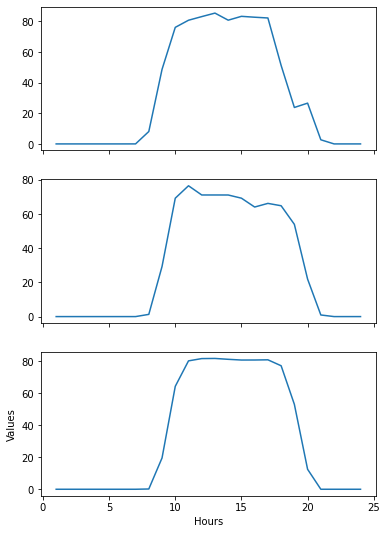

In [22]:
plot_series('SE005T002',['2019-01-10', '2019-02-10', '2019-03-10'],'gen_solar_total_mwh')

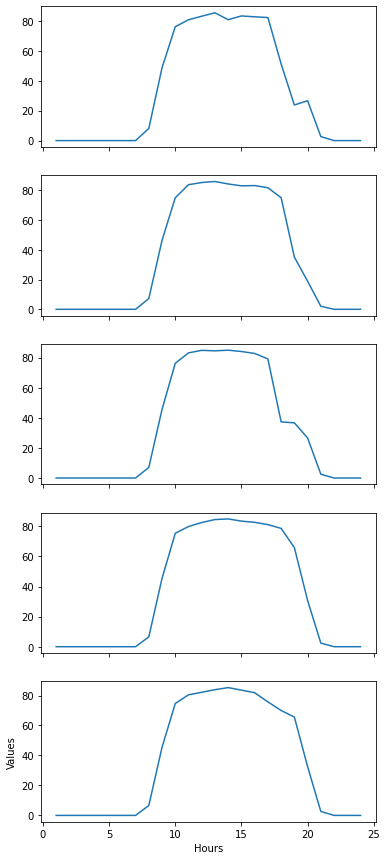

In [23]:
plot_series('SE005T002',['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14'],'gen_solar_total_mwh')

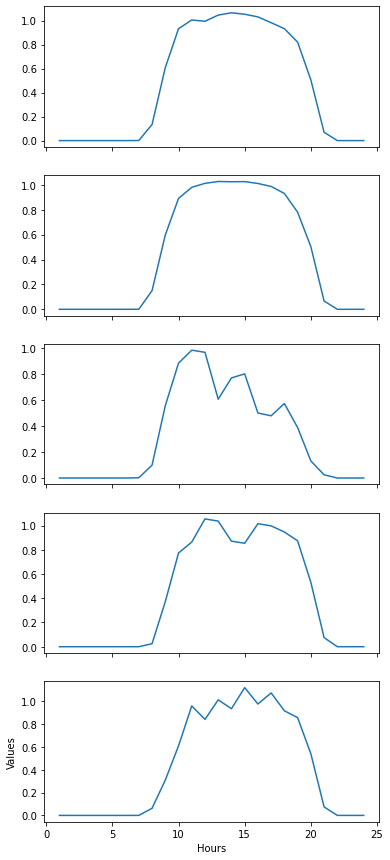

In [24]:
plot_series('SE127T005',['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14'],'gen_solar_total_mwh')

Notamos de los gráficos anteriores que para las distintas subestaciones presentan comportamientos bastante similares, teniendo en cuenta que las generaciones comienzan alrededor de las 6-7 y terminando 21-22 horas. Lo anterior es bastante lógico pensando que estas gráficas corresponden a energía generada por luz solar.

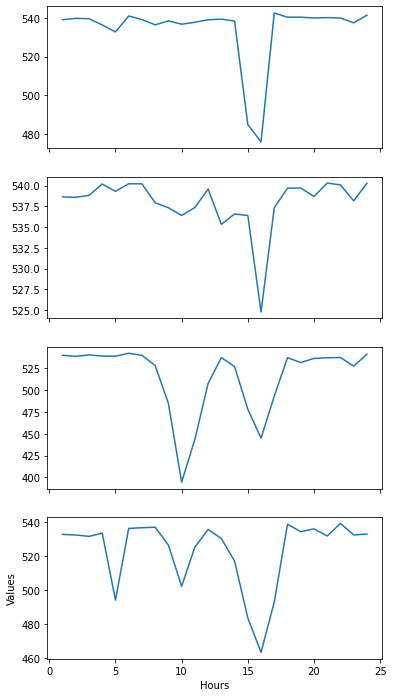

In [25]:
plot_series('SE020G213',['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17'],'gen_termica_total_mwh')

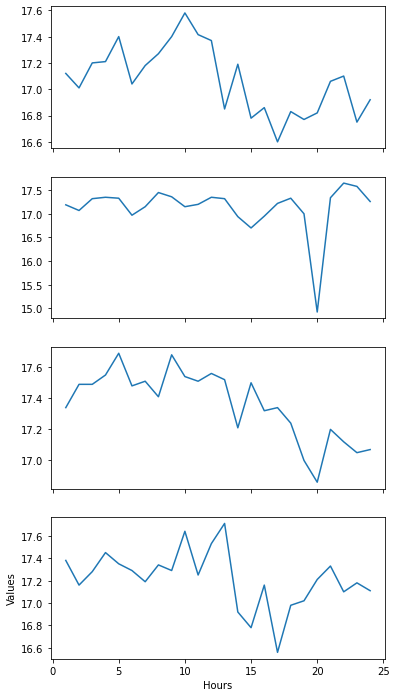

In [26]:
plot_series('SE106G216',['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17'],'gen_termica_total_mwh')

Para los últimos ejemplos es un poco más complicado hacer una comparación dado que existen algunas gráficas que presentan una tendencia a la baja (desde el inicio al final del día) mientras que otros claramente tienen un valor de generación bastante más estable, excepto por caidas abruptas de la generación. Estas últimas deben ser consecuencia de algún proceso dentro de la generación térmica de la energía, dado que dichas caidas están presentes en varios gráficos.

# Punto 5

Acá crearemos la variable `target` tal como se especifica en el documento del desafío, así como también la variable `en_total_mwh`

In [27]:
def costo_cat(value):
    if abs(value) <= 15:
        res = 0
    else :
        res = 1
    return res

datos_pred['target'] = datos_pred['cmg_desv_pct'].apply(costo_cat)
datos_pred.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,demanda_mwh,cap_inst_mw,year,month,day,weekday,weekday_name,day_year,weekend,target
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,...,1210767,13.20785,2019,1,4,4,Friday,4,Week day,0
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,...,113232,13.20785,2019,1,4,4,Friday,4,Week day,0
2,SE031G216,2019-01-04 00:00:00+00:00,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,...,1089415,13.20785,2019,1,4,4,Friday,4,Week day,0
3,SE031G216,2019-01-04 00:00:00+00:00,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,...,1096867,13.20785,2019,1,4,4,Friday,4,Week day,1
4,SE031G216,2019-01-04 00:00:00+00:00,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,...,1071851,13.20785,2019,1,4,4,Friday,4,Week day,1


In [28]:
datos_pred['en_total_mwh'] = datos_pred.iloc[:,3:8].sum(axis = 1)
datos_pred.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cap_inst_mw,year,month,day,weekday,weekday_name,day_year,weekend,target,en_total_mwh
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,...,13.20785,2019,1,4,4,Friday,4,Week day,0,0.0
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,...,13.20785,2019,1,4,4,Friday,4,Week day,0,0.0
2,SE031G216,2019-01-04 00:00:00+00:00,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,...,13.20785,2019,1,4,4,Friday,4,Week day,0,0.0
3,SE031G216,2019-01-04 00:00:00+00:00,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,...,13.20785,2019,1,4,4,Friday,4,Week day,1,0.0
4,SE031G216,2019-01-04 00:00:00+00:00,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,...,13.20785,2019,1,4,4,Friday,4,Week day,1,0.0


# Punto 7

Cargamos y hacemos el merge con los datos de clima

In [38]:
clima = pd.read_csv('data/datos_clima.csv')
clima.tail(30)

,fecha,subestacion,lat,lon,ALLSKY_SFC_SW_DWN,KT,PRECTOT,RH2M,T2M,T2MDEW,T2M_MAX,T2M_MIN,TQV,TS,WS10M,WS10M_MAX,WS10M_MIN,WS50M,WS50M_MAX,WS50M_MIN
5219,2019-01-15 00:00:00 UTC,SE005R002,-33.267621,-70.730832,9.48,0.79,0.00,28.41,20.16,1.17,28.52,11.90,0.89,22.65,2.75,5.32,0.33,2.73,4.45,0.48
5220,2019-01-10 00:00:00 UTC,SE009T002,-37.095143,-72.321635,9.48,0.78,0.00,37.71,15.83,1.31,26.74,4.63,0.73,15.97,1.90,2.61,1.27,3.34,5.23,1.95
5221,2019-01-15 00:00:00 UTC,SE015R002,-33.547230,-70.544867,9.48,0.79,0.00,28.09,20.75,1.52,29.44,12.03,0.97,22.97,2.54,4.82,0.60,2.55,4.11,0.73
5222,2019-01-15 00:00:00 UTC,SE004L079,-33.607927,-70.557676,9.48,0.79,0.00,28.09,20.75,1.52,29.44,12.03,0.97,22.97,2.54,4.82,0.60,2.55,4.11,0.73
5223,2019-01-15 00:00:00 UTC,SE055T005,-33.981594,-70.701865,9.48,0.79,0.00,28.09,20.75,1.52,29.44,12.03,0.97,22.97,2.54,4.82,0.60,2.55,4.11,0.73
5224,2019-06-12 00:00:00 UTC,SE009G004,-37.360811,-71.866829,0.39,0.10,21.17,94.75,6.55,5.74,8.75,3.94,1.49,6.48,4.83,6.79,2.01,8.02,11.16,3.84
5225,2019-06-04 00:00:00 UTC,SE009G004,-37.360811,-71.866829,0.39,0.10,8.36,73.99,7.84,3.53,11.69,5.81,1.73,7.68,3.51,4.81,2.10,6.15,7.52,5.08
5226,2019-06-27 00:00:00 UTC,SE009G004,-37.360811,-71.866829,0.39,0.10,45.22,97.97,3.56,3.25,5.54,2.40,1.57,3.46,5.22,7.44,2.11,8.57,11.72,3.98
5227,2019-05-04 00:00:00 UTC,SE127T005,-34.867935,-71.141328,0.78,0.14,2.90,74.90,14.46,10.12,18.52,12.22,2.44,14.14,1.85,3.61,0.11,3.00,4.99,0.17
5228,2019-05-23 00:00:00 UTC,SE005T003,-42.626987,-73.805673,1.06,0.29,0.08,91.30,8.64,7.27,10.94,6.75,1.76,8.73,2.45,3.90,1.12,3.61,5.61,1.53


los datos de clima estan por día, por lo que el merge se realizará mediante un left join hacia los datos de predicción

In [40]:
clima['fecha'] = pd.to_datetime(clima['fecha'])
base_pred_clima = pd.merge(datos_pred,clima,left_on=['fecha','nemotecnico_se'],
                          right_on = ['fecha','subestacion'],how='left')
base_pred_clima

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,T2M_MAX,T2M_MIN,TQV,TS,WS10M,WS10M_MAX,WS10M_MIN,WS50M,WS50M_MAX,WS50M_MIN
0,SE031G216,2019-01-04 00:00:00+00:00,1,NaN,NaN,NaN,NaN,0.000,56.2,55.627852,...,25.07,17.16,3.33,23.89,3.56,6.31,1.50,3.40,5.49,1.47
1,SE031G216,2019-01-04 00:00:00+00:00,2,NaN,NaN,NaN,NaN,0.000,56.2,55.376645,...,25.07,17.16,3.33,23.89,3.56,6.31,1.50,3.40,5.49,1.47
2,SE031G216,2019-01-04 00:00:00+00:00,3,NaN,NaN,NaN,NaN,0.000,56.2,59.531891,...,25.07,17.16,3.33,23.89,3.56,6.31,1.50,3.40,5.49,1.47
3,SE031G216,2019-01-04 00:00:00+00:00,4,NaN,NaN,NaN,NaN,0.000,56.2,174.378923,...,25.07,17.16,3.33,23.89,3.56,6.31,1.50,3.40,5.49,1.47
4,SE031G216,2019-01-04 00:00:00+00:00,5,NaN,NaN,NaN,NaN,0.000,56.2,172.820310,...,25.07,17.16,3.33,23.89,3.56,6.31,1.50,3.40,5.49,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00+00:00,20,NaN,NaN,NaN,NaN,0.775,44.1,41.362200,...,13.05,5.72,0.92,9.04,5.17,6.95,2.79,6.56,8.40,3.35
112775,SE170T005,2019-06-30 00:00:00+00:00,21,NaN,NaN,NaN,NaN,0.925,44.1,42.217780,...,13.05,5.72,0.92,9.04,5.17,6.95,2.79,6.56,8.40,3.35
112776,SE170T005,2019-06-30 00:00:00+00:00,22,NaN,NaN,NaN,NaN,0.975,44.1,42.197451,...,13.05,5.72,0.92,9.04,5.17,6.95,2.79,6.56,8.40,3.35
112777,SE170T005,2019-06-30 00:00:00+00:00,23,NaN,NaN,NaN,NaN,0.750,44.1,41.473556,...,13.05,5.72,0.92,9.04,5.17,6.95,2.79,6.56,8.40,3.35


# Comentario Final

Lamentablemente solo llegué hasta esto luego de las 5 horas y en particular creo que es importante que ustedes puedan ver lo que alcancé a realizar en el tiempo que se estimaba, por ello lo deje hasta acá.

Solo como comentarios de cómo hubiese seguido, es modelando mediantes series de tiempo (ARIMA, SARIMA en los casos paramétricos o SSA para no-paramétrico) para cada subestación, tratando de predecir la variable target. En términos de predicción, como se requiere (en el punto 5) tendríamos que hacer un shift en la variable target de modo que el modelo se entrene utilizando los registos de una hora x pero el target correspondería a una hora x+1, así sabremos que al entregarle variables de una hora en especifica nuestra predicción nos estará entregando lo que ocurrirá en la hora siguiente.

Para validar, típicamente podríamos tomar las horas finales del día y ajustar el modelo con (por ejemplo) las primeras 20 horas de un día y validar con las que restan, para así poder medir el performance del modelo.

Otra forma sería mirandolo desde un punto de vista de clasificación (variable target 0 y 1), mediante algún modelo ensamblado como XGBoost u otros métodos de Machina Learning.

En el punto 6, creo que debiesemos cambiar el shift de solo una hora a 12, porque tendremos los datos actualizados en bloques de 12 horas, pero ahi habría que ver el modelo y su performance por lo que sin verlo en específico no podría decir mucho más, al igual que con el punto 7 dado que vuelve a comprar hacia atrás ahora con las fechas.

Finalmente concluir que el problema es super interesante y muy útil claramente, tener un modelo preciso que anticipe desvíos de la planificación, sobre todo si se tiene el tiempo para reaccionar podría generar un impacto positivo en temas de manejo de costos.